# Setup

## Options

Replogle ESS CRISPR:

Essential (Pertpy is larger)

https://plus.figshare.com/articles/dataset/_Mapping_information-rich_genotype-phenotype_landscapes_with_genome-scale_Perturb-seq_Replogle_et_al_2022_processed_Perturb-seq_datasets/20029387

In [15]:
import crispr as cr 
import pertpy
import muon
import os
import numpy as np
from config import (files_data, label_cell_type_data, gene_symbols_data, 
                    assays_data, layer_perturbation_data,
                    label_perturbation_data, key_control_data, 
                    perturbation_type_data, target_genes_data,
                    load_example_data)
# Options
print(dir(cr.ax))
# file = "CRISPRi_scr"
file = "ECCITE"
# file = "augur_ex"
# file = "pool"
target_gene_idents = None
target_gene_idents = ["IFNGR2", "STAT1"]
assay = None
# regress_out = ['total_counts', 'pct_counts_mt']
regress_out = None
process_kws = dict(hvg_kws = dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                   target_sum = 1e4, max_genes_by_counts = 2500, 
                   max_pct_mt = 5, min_genes = 200, min_cells = 3, scale = 10,
                   regress_out = regress_out)
write_public = True  # if need to download public data, write to examples/data?

#  Set Arguments
label_cell_type = label_cell_type_data[file]
label_perturbation = label_perturbation_data[file]
key_control, perturbation_type, label_target_genes, layer = [
    x[file] for x in [key_control_data, perturbation_type_data, 
                      target_genes_data, layer_perturbation_data]
]
col_gene_symbol = gene_symbols_data[file]
if file in assays_data:
    if isinstance(assays_data[file], str) or assays_data[file] is None:
        assays_data[file] = [assays_data[file], None]
    assay, assay_protein = assays_data[file]
else:
    assay, assay_protein = None
print(files_data)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'cluster', 'clustering', 'perform_augur', 'perform_differential_prioritization', 'perform_mixscape', 'perturbations']
{'CRISPRi_scr': '/home/asline01/projects/crispr/examples/data/filtered_feature_bc_matrix_HH03', 'CRISPRi_wgs': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_gwps.h5ad', 'CRISPRi_ess': '/home/asline01/projects/crispr/examples/data/replogle_2022_k562_esss.h5ad', 'pool': '/home/asline01/projects/crispr/examples/data/data_pertpy_norman_2019_raw.h5ad', 'bulk': '/home/asline01/projects/crispr/examples/data/burczynski_crohn.h5ad', 'screen': '/home/asline01/projects/crispr/examples/data/dixit_2016_raw.h5ad', 'perturb-seq': '/home/asline01/projects/crispr/examples/data/adamson_2016_upr_perturb_seq.h5ad', 'ECCITE': '/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad', 'augur_ex': '/home/asline01/projects/crispr/examples/data/bhatta

## Data

### Load

In [18]:
adata = load_example_data(file, col_gene_symbol, 
                          write_public=write_public)  # (down)load h5ad file
adata

/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad


/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad exists.

<<< LOADING FILE /home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad with sc.read()>>>



/home/asline01/projects/crispr/examples/data/papalexi_2021.h5ad failed to load:

Above error raised while reading key '/' of type <class 'h5py._hl.files.File'> from /.


Looking for downloadable files for: ECCITE.


MuData object with n_obs × n_vars = 20729 × 18776
  4 modalities
    rna:	20729 x 18649
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    adt:	20729 x 4
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    hto:	20729 x 12
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'
    gdo:	20729 x 111
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase'
      var:	'name'

### Inspect

In [19]:
print(adata[assay].obs[label_perturbation].unique() if assay else adata.obs[
    label_perturbation].unique())
print(adata.layers)
adata[assay].obs.head() if assay else adata.obs.head()

['Perturbed', 'NT']
Categories (2, object): ['NT', 'Perturbed']
None


,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,nCount_GDO,nCount_ADT,nFeature_ADT,percent.mito,MULTI_ID,HTO_classification,guide_ID,gene_target,NT,perturbation,replicate,S.Score,G2M.Score,Phase
index,,,,,,,,,,,,,,,,,,,
l1_AAACCTGAGCCAGAAC,Lane1,17207,3942,99.0,4,576.0,801.0,4,2.295577,rep1-tx,rep1-tx,STAT2g2,STAT2,STAT2g2,Perturbed,rep1,-0.252716,-0.771309,G1
l1_AAACCTGAGTGGACGT,Lane1,9506,2948,35.0,5,190.0,545.0,4,4.512939,rep1-tx,rep1-tx,CAV1g4,CAV1,CAV1g4,Perturbed,rep1,-0.123802,-0.332603,G1
l1_AAACCTGCATGAGCGA,Lane1,15256,4258,66.0,4,212.0,344.0,4,4.116413,rep1-tx,rep1-tx,STAT1g2,STAT1,STAT1g2,Perturbed,rep1,-0.154633,-0.694418,G1
l1_AAACCTGTCTTGTCAT,Lane1,5135,1780,22.0,3,243.0,539.0,4,5.491723,rep1-tx,rep1-tx,CD86g1,CD86,CD86g1,Perturbed,rep1,-0.061262,-0.037820,G1
l1_AAACGGGAGAACAACT,Lane1,9673,2671,99.0,5,198.0,1053.0,4,3.359868,rep1-tx,rep1-tx,IRF7g2,IRF7,IRF7g2,Perturbed,rep1,-0.132188,-0.353156,G1


### Process

In [20]:
print(process_kws)
adata = cr.pp.process_data(adata, assay=assay, **process_kws)  # process
if assay_protein is not None:  # if includes protein assay
    muon.prot.pp.clr(adata[assay_protein])
print(adata)
adata.obs

{'hvg_kws': {'min_mean': 0.0125, 'max_mean': 3, 'min_disp': 0.5}, 'target_sum': 10000.0, 'max_genes_by_counts': 2500, 'max_pct_mt': 5, 'min_genes': 200, 'min_cells': 3, 'scale': 10, 'regress_out': None}

<<< NORMALIZING >>>

<<< FILTERING >>>

<<< DETECTING VARIABLE GENES >>>

<<< SCALING >>>



MuData object with n_obs × n_vars = 20729 × 18776
  4 modalities
    rna:	20684 x 1896
      obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
      var:	'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
      uns:	'log1p', 'hvg'
    adt:	20729 x 4
      obs:	'orig.ident',

,rna:orig.ident,rna:nCount_RNA,rna:nFeature_RNA,rna:nCount_HTO,rna:nFeature_HTO,rna:nCount_GDO,rna:nCount_ADT,rna:nFeature_ADT,rna:percent.mito,rna:MULTI_ID,...,gdo:MULTI_ID,gdo:HTO_classification,gdo:guide_ID,gdo:gene_target,gdo:NT,gdo:perturbation,gdo:replicate,gdo:S.Score,gdo:G2M.Score,gdo:Phase
index,,,,,,,,,,,,,,,,,,,,,
l1_AAACCTGAGCCAGAAC,Lane1,17207,3942,99.0,4,576.0,801.0,4,2.295577,rep1-tx,...,rep1-tx,rep1-tx,STAT2g2,STAT2,STAT2g2,Perturbed,rep1,-0.252716,-0.771309,G1
l1_AAACCTGAGTGGACGT,Lane1,9506,2948,35.0,5,190.0,545.0,4,4.512939,rep1-tx,...,rep1-tx,rep1-tx,CAV1g4,CAV1,CAV1g4,Perturbed,rep1,-0.123802,-0.332603,G1
l1_AAACCTGCATGAGCGA,Lane1,15256,4258,66.0,4,212.0,344.0,4,4.116413,rep1-tx,...,rep1-tx,rep1-tx,STAT1g2,STAT1,STAT1g2,Perturbed,rep1,-0.154633,-0.694418,G1
l1_AAACCTGTCTTGTCAT,Lane1,5135,1780,22.0,3,243.0,539.0,4,5.491723,rep1-tx,...,rep1-tx,rep1-tx,CD86g1,CD86,CD86g1,Perturbed,rep1,-0.061262,-0.037820,G1
l1_AAACGGGAGAACAACT,Lane1,9673,2671,99.0,5,198.0,1053.0,4,3.359868,rep1-tx,...,rep1-tx,rep1-tx,IRF7g2,IRF7,IRF7g2,Perturbed,rep1,-0.132188,-0.353156,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l8_TTTGTCAGTCACTTCC,Lane8,20863,4884,294.0,4,290.0,398.0,4,5.469012,rep3-tx,...,rep3-tx,rep3-tx,CMTM6g1,CMTM6,CMTM6g1,Perturbed,rep3,-0.323562,-0.794679,G1
l8_TTTGTCAGTGACGGTA,Lane8,17553,3787,528.0,3,870.0,3042.0,4,2.159175,rep4-tx,...,rep4-tx,rep2-tx,NTg4,NT,NT,NT,rep2,-0.153514,-0.632655,G1
l8_TTTGTCAGTTCCACAA,Lane8,15106,4185,154.0,6,267.0,212.0,4,2.661194,rep3-tx,...,rep3-tx,rep3-tx,ATF2g1,ATF2,ATF2g1,Perturbed,rep3,-0.191933,-0.574283,G1


### Assign Guide RNAs

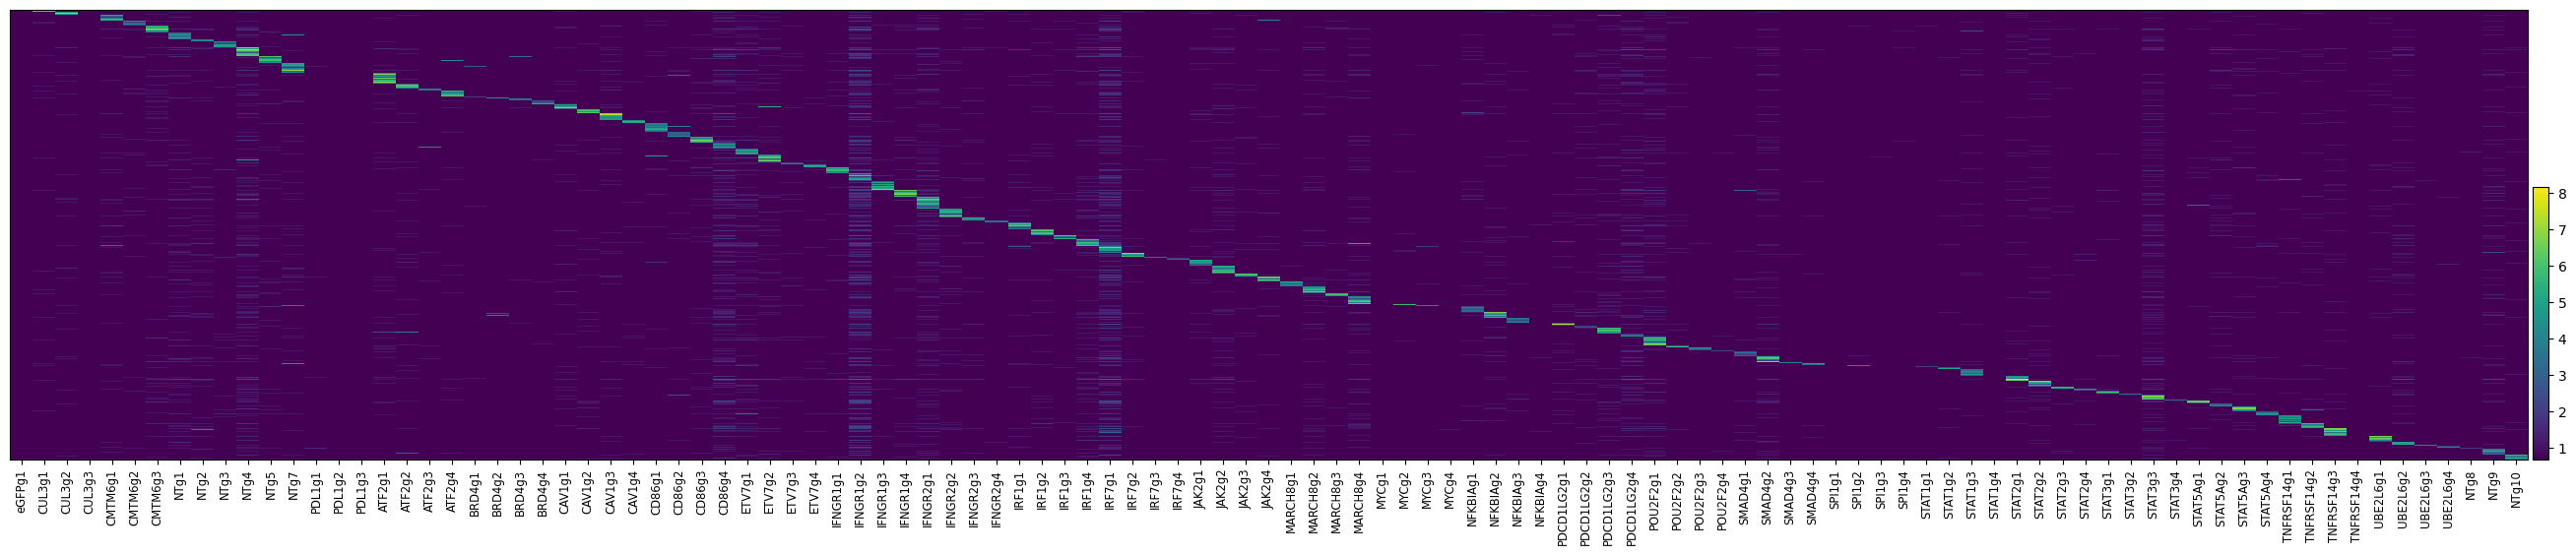

index
l1_AAACCTGAGCCAGAAC    STAT2g2
l1_AAACCTGAGTGGACGT     CAV1g4
l1_AAACCTGCATGAGCGA    STAT1g2
l1_AAACCTGTCTTGTCAT     CD86g1
l1_AAACGGGAGAACAACT     IRF7g2
                        ...   
l8_TTTGTCAGTCACTTCC    CMTM6g1
l8_TTTGTCAGTGACGGTA       NTg4
l8_TTTGTCAGTTCCACAA     ATF2g1
l8_TTTGTCATCACGCATA     CAV1g2
l8_TTTGTCATCTGTACGA    STAT3g1
Name: assigned_guide, Length: 20729, dtype: object


In [21]:
if "mod" in dir(adata) and "gdo" in adata.mod:  # Guide RNA assignment
    figs_guide_rna = cr.pp.assign_guide_rna(adata, plot=True, 
                                            show_gene_labels=True)

# Analysis

## UMAP



<<< PERFORMING PCA >>>


<<< COMPUTING NEIGHBORHOOD GRAPH >>>


<<< EMBEDDING WITH UMAP >>>


<<< CLUSTERING using LEIDEN METHOD >>>


<<< CREATING UMAP PLOTS >>>


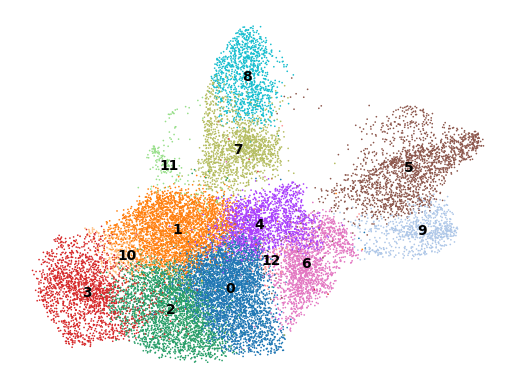

In [22]:
figs_cluster = cr.ax.clustering.cluster(adata, assay=assay, plot=True, 
                                        method_cluster="leiden")

## Mixscape

Perturbations:
Perturbed, NT
categories: IFNGR2 KO, IFNGR2 NP, NT
var_group_labels: NT


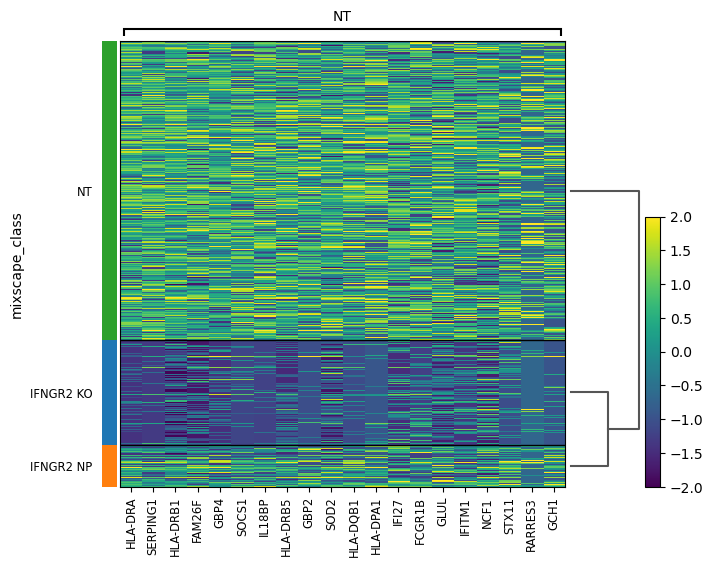

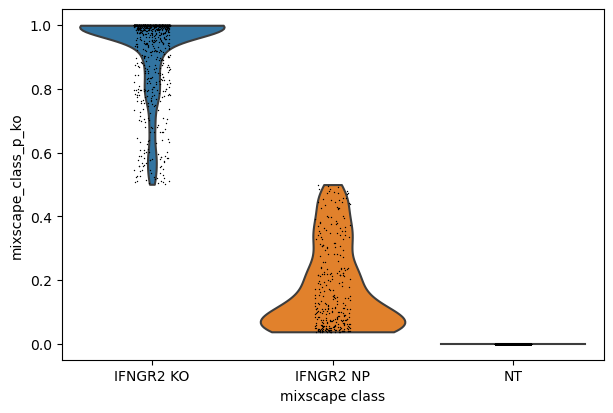

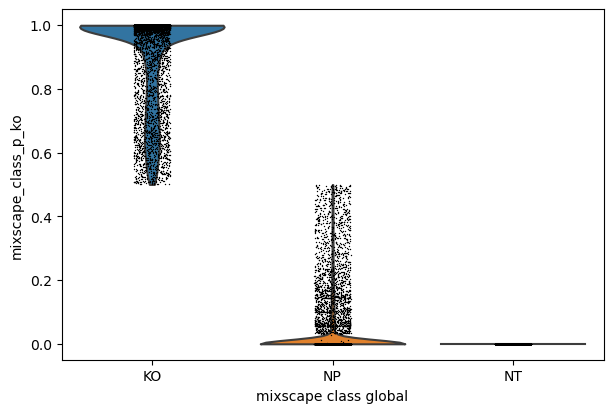

categories: NT, STAT1 KO, STAT1 NP
var_group_labels: NT


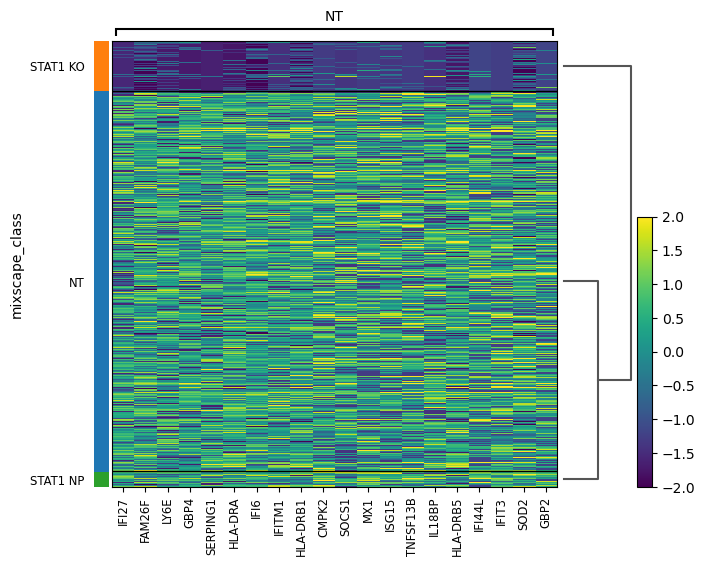

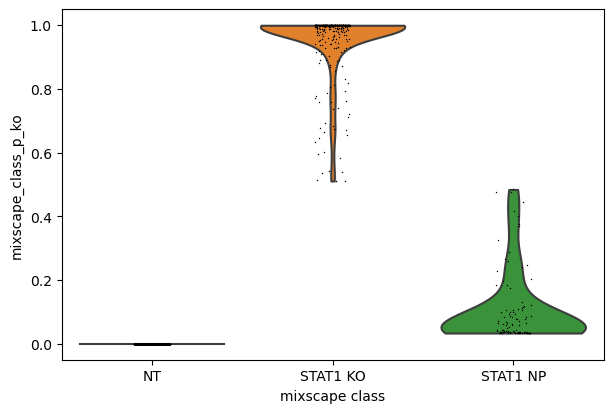

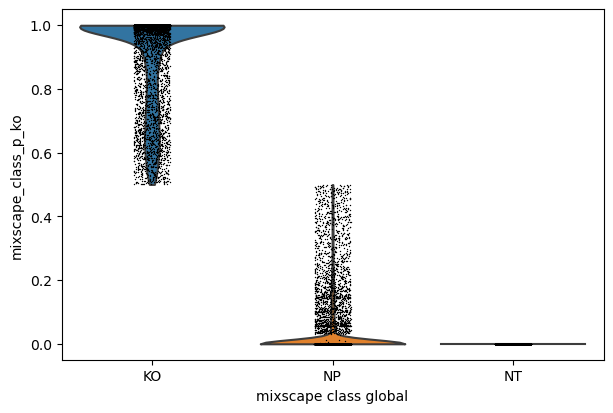

In [23]:
if assay:
    print("Perturbations:\n" + ", ".join(
        adata[assay].obs[label_perturbation].astype(str).unique()))
else:
    print("Perturbations:\n" + ", ".join(
        adata.obs[label_perturbation].astype(str).unique()))
if layer is not None:  # if want to perform Mixscape
    figs_mix = cr.ax.perform_mixscape(adata, label_perturbation, assay=assay, 
                                      key_control=key_control,
                                      perturbation_type=perturbation_type,
                                      target_gene_idents=target_gene_idents,
                                      label_target_genes=label_target_genes, 
                                      layer=layer, min_de_genes=5,
                                      split_by=None, plot=True)

## Augur

Output()

/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
/home/asline01/anaconda3/e

/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3
To use sccoda or tasccoda please install ete3 with pip install ete3


To use sccoda or tasccoda please install ete3 with pip install ete3


index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

index
l1_AAACCTGAGCCAGAAC     7
l1_AAACCTGAGTGGACGT     0
l1_AAACCTGCATGAGCGA     6
l1_AAACCTGTCTTGTCAT     2
l1_AAACGGGAGAACAACT     2
                       ..
l8_TTTGTCAGTCACTTCC    12
l8_TTTGTCAGTGACGGTA     3
l8_TTTGTCAGTTCCACAA     1
l8_TTTGTCATCACGCATA     0
l8_TTTGTCATCTGTACGA     0
Name: cell_type, Length: 20684, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

Skipping 11 cell type - the number of samples for at least one class type is less than subsample size 20.

Skipping 12 cell type - the number of samples for at least one class type is less than subsample size 20.

                         7         0         6         2        10         1  \
mean_augur_score  0.562494  0.529433  0.725045  0.502052  0.500896  0.510261   
mean_auc          0.562494  0.529433  0.725045  0.502052  0.500896  0.510261   
mean_accuracy     0.535678  0.506264  0.653663  0.490513  0.491648  0.502381   
mean_precision    0.547519  0.508669  0.675277  0.488564  0.493348  0.507105   
mean_f1           0.481163  0.473000  0.630348  0.427483  0.459399  0.469749   
mean_recall       0.473810  0.488413  0.632063  0.427778  0.471270  0.478889   

                         4         5         3         9         8  
mean_augur_score  0.542222  0.527562  0.511882  0.600385  0.476803  
mean_auc          0.542222  0.527562  0.511882  0.600385  0.476803  
mean_accuracy     0.515348  0.505971  0.503333  0.571758  0.489414  
mean_precision    0.510472  0.519782  0.504341  0.586974  0.496550  
mean_f1           0.476025  0.467054  0.469310  0.550048  0.458581  
mean_recall       0.48841

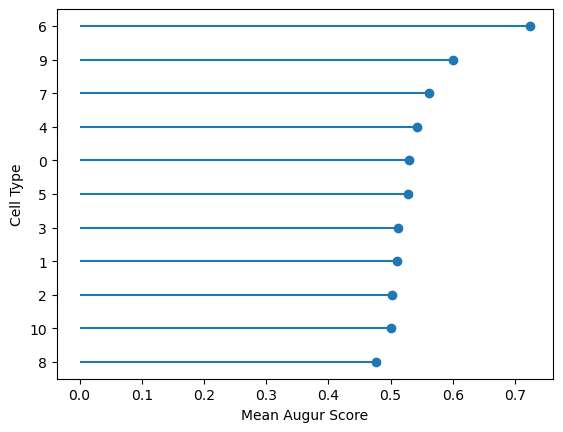

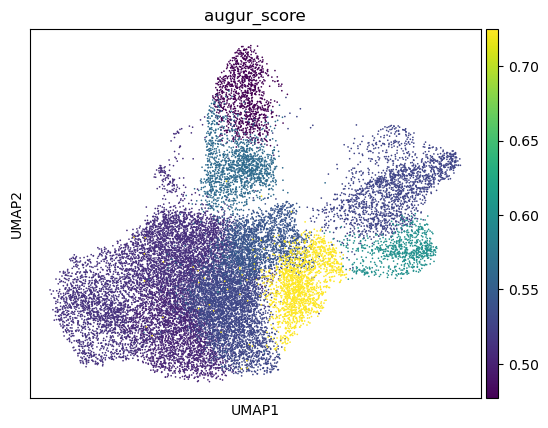

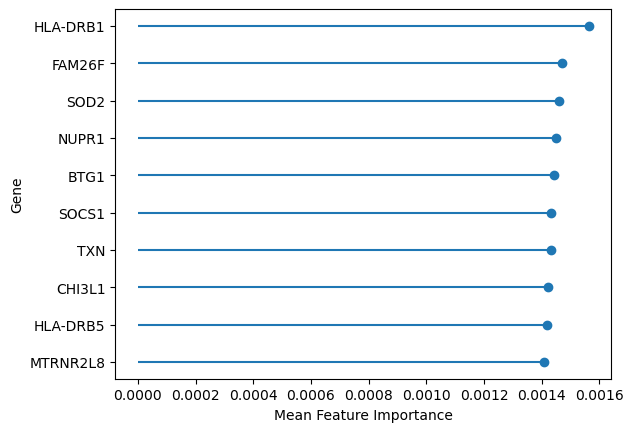

In [24]:
if assay:
    num_conds = len(adata[assay].obs[label_perturbation].astype(str).unique())
else:
    num_conds = len(adata.obs[label_perturbation].astype(str).unique())
d_aug, res_aug, fig_aug = cr.ax.perform_augur(
    adata, assay=assay, label_cell_type=label_cell_type, 
    classifier="random_forest_classifier", augur_mode="velocity", 
    subsample_size=20, select_variance_features=False, 
    seed=1618, n_threads=4, plot=True, 
    label_col=label_perturbation, 
    label_condition=perturbation_type if num_conds > 2 else None,
    treatment=key_control if num_conds > 2 else None)